In [26]:
# Loading required Python libraries
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve, cross_val_score
import numpy as np

In [27]:
# Loading digits dataset from sklearn
data = datasets.load_breast_cancer()

# Features
X = data.data

# Target
y = data.target

# Dataset description
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [28]:
# Displaying posible target values
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
# train-test split of the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [30]:
# Loading classifier classifier
classifier = RandomForestClassifier()

In [31]:
# Function to train and evaluate a classifier
def classifier_eval(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_test)

    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

# Function to get the learning curve of a model
def get_learning_curve(classifier, X_train, y_train):
    N, train_score, val_score = learning_curve(classifier, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1, 1, num=10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[ 60   3]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Scores: [0.975      0.9125     0.9625     0.94936709 0.96202532]
Accuracy: 0.95228 (+/- 0.04296)


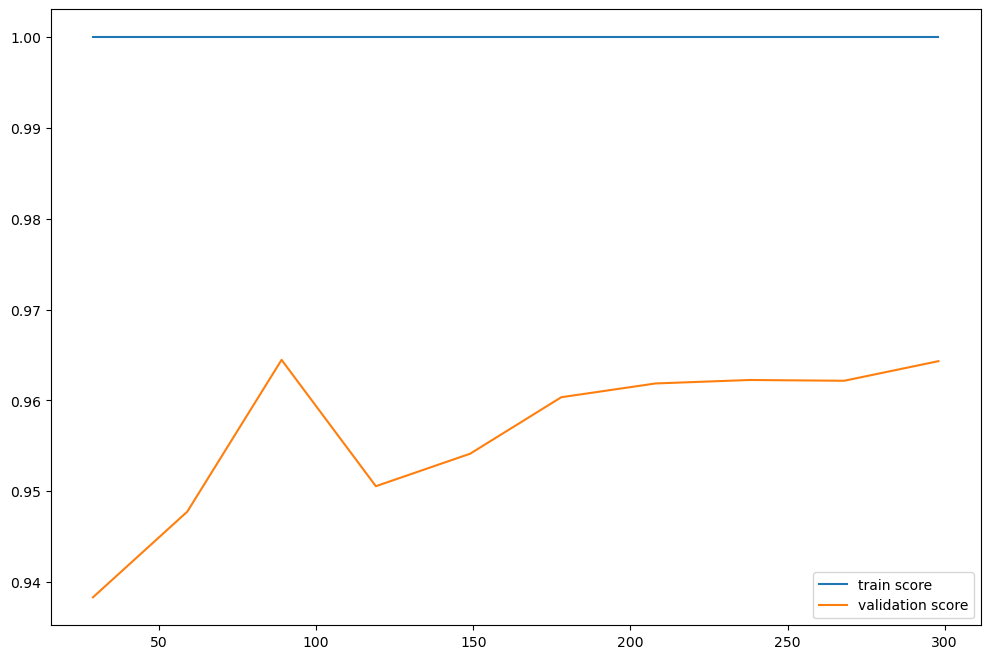

In [32]:
classifier_eval(classifier, X_train, y_train, X_test, y_test)

# Classifier evaluation via cross validation
scores = cross_val_score(classifier, X_train, y_train, cv=5)

# Displaying the scores for each cross validation
print("Scores:", scores)

# Displaying classifier accuracy
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

get_learning_curve(classifier, X_train, y_train)

In [38]:
# GridSearchCV
pgrid = {"max_samples": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
        "max_features": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
grid_search = GridSearchCV((RandomForestClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))
print("Meilleur paramètre :  ", grid_search.best_params_)

Meilleur score : 0.9649122807017544
max_samples: 0.6
max_features: 0.1
Meilleur paramètre :   {'max_features': 0.1, 'max_samples': 0.6}


In [39]:
classifier_best_params = RandomForestClassifier(**grid_search.best_params_) 

[[ 60   3]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        63
           1       0.97      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Scores: [0.975      0.9125     0.9625     0.96202532 0.97468354]
Accuracy: 0.95734 (+/- 0.04623)


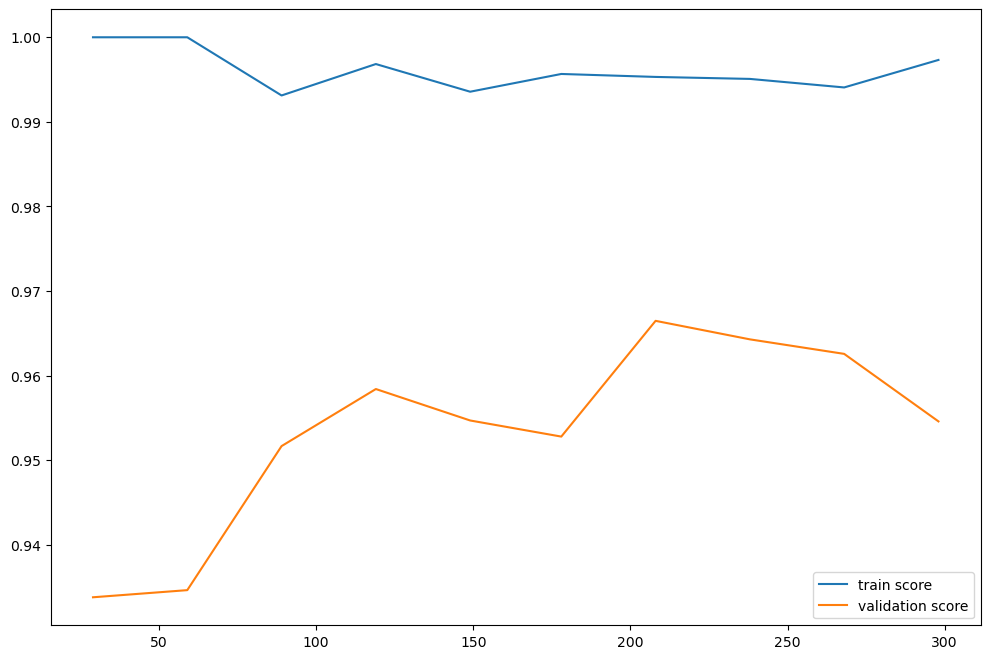

In [40]:
classifier_eval(classifier_best_params, X_train, y_train, X_test, y_test)

# Model evaluation via cross validation
scores = cross_val_score(classifier_best_params, X_train, y_train, cv=5)

# Displaying the scores for each cross validation
print("Scores:", scores)

# Displaying model accuracy
print("Accuracy: %0.5f (+/- %0.5f)" % (scores.mean(), scores.std() * 2))

get_learning_curve(classifier_best_params, X_train, y_train)